In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('sgemm_product.csv')
sns.set()

In [ ]:
print("Number of nulls for each column:")
print(df.isnull().sum())
print(df.shape)

Number of nulls for each column:
MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64
(241600, 18)


In [ ]:
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df = df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MWG      241600 non-null  int64  
 1   NWG      241600 non-null  int64  
 2   KWG      241600 non-null  int64  
 3   MDIMC    241600 non-null  int64  
 4   NDIMC    241600 non-null  int64  
 5   MDIMA    241600 non-null  int64  
 6   NDIMB    241600 non-null  int64  
 7   KWI      241600 non-null  int64  
 8   VWM      241600 non-null  int64  
 9   VWN      241600 non-null  int64  
 10  STRM     241600 non-null  int64  
 11  STRN     241600 non-null  int64  
 12  SA       241600 non-null  int64  
 13  SB       241600 non-null  int64  
 14  Runtime  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70d3b55e10>,
      dtype=object)

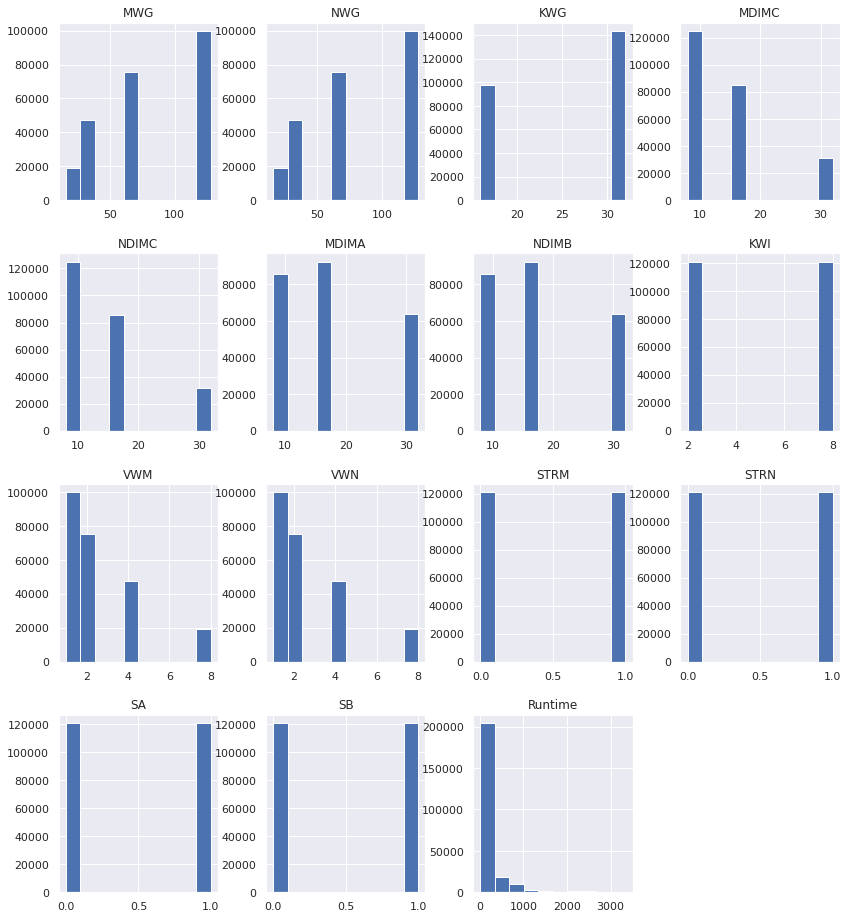

In [ ]:
sns.set()
df.hist(figsize=(14,16))

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


Preprocessing

In [ ]:
Q1=df['Runtime'].quantile(0.25)
Q3=df['Runtime'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR
df = df[(df.Runtime>MIN) & (df.Runtime<MAX)]

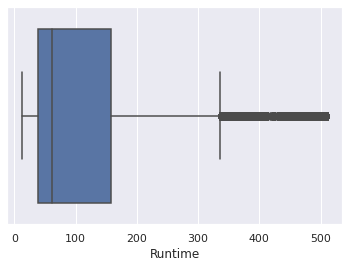

In [ ]:
sns.boxplot(x=df['Runtime']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


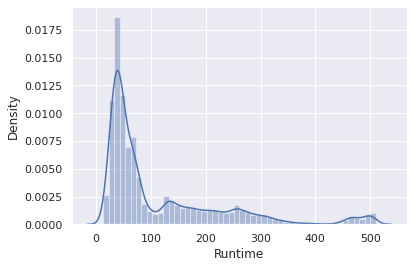

In [ ]:
sns.distplot(df['Runtime'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


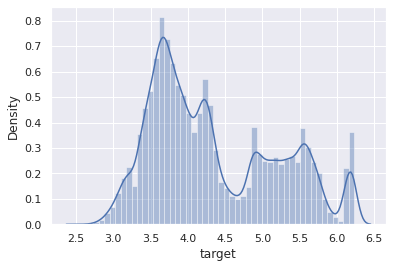

In [ ]:
df['target']=np.log(df.Runtime)
sns.distplot(df['target'])

Text(0.5, 1.0, 'Variable Correlation')

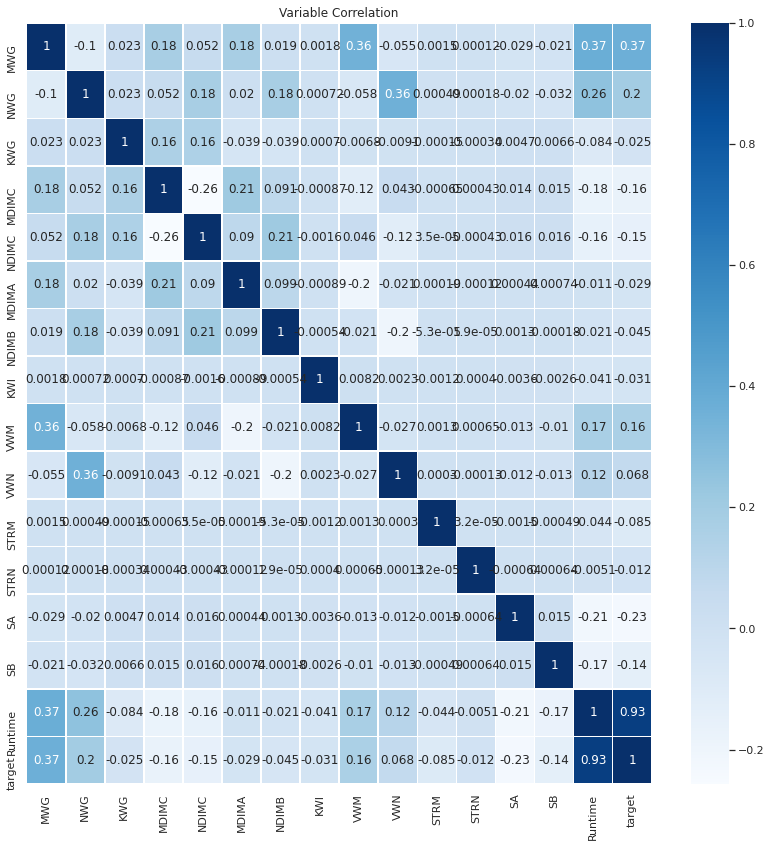

In [ ]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(df.corr(),annot=True, linewidths=.5, cmap=plt.cm.Blues)
plt.title('Variable Correlation')

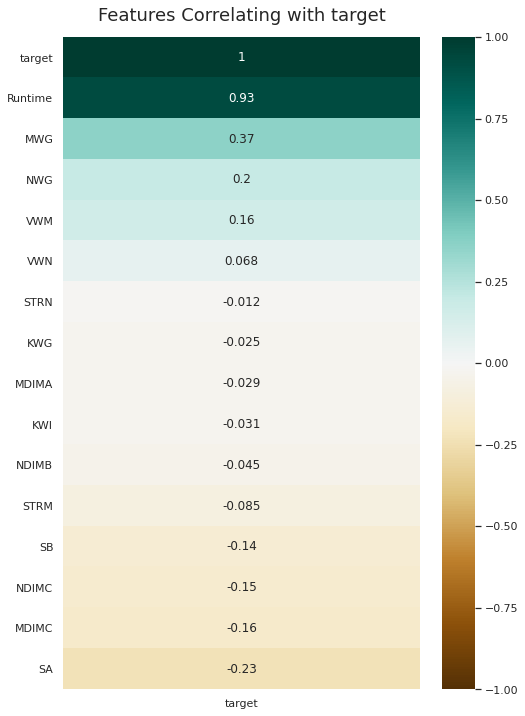

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16);


In [ ]:
df_target = df[['target']]
Y = df_target.to_numpy().ravel()
df_features = df.drop(columns=['target','Runtime'])
X = df_features.to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


MSE with alpha=0.0001: 0.42371348127454483  /  N iterations to converge: 7
MSE with alpha=0.001: 0.4240821667125066  /  N iterations to converge: 7
MSE with alpha=0.01: 0.4288510169949625  /  N iterations to converge: 7
MSE with alpha=0.05: 0.46689829905216357  /  N iterations to converge: 7
MSE with alpha=0.1: 0.5062802207526259  /  N iterations to converge: 7
MSE with alpha=0.2: 0.5563622450385162  /  N iterations to converge: 7
MSE with alpha=0.3: 0.5899514919636014  /  N iterations to converge: 7
MSE with alpha=0.4: 0.6095452638464551  /  N iterations to converge: 7
MSE with alpha=0.5: 0.6261418768002973  /  N iterations to converge: 7
MSE with alpha=0.6: 0.6396442739529984  /  N iterations to converge: 7
MSE with alpha=0.7: 0.64830430309894  /  N iterations to converge: 7


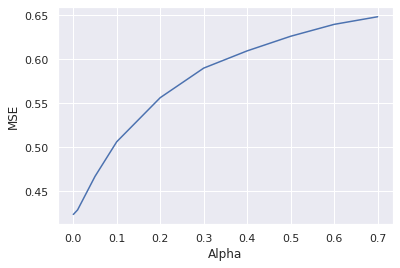

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
list_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
list_MSE = []

for i in list_alpha:
    regr = SGDRegressor(alpha = i)
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)
    MSE = mean_squared_error(Y_test, Y_pred)
    list_MSE.append(MSE)
    print(f'MSE with alpha={i}: {MSE}  /  N iterations to converge: {regr.n_iter_}')
    
plt.plot(list_alpha,list_MSE)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

In [ ]:
for i in range(0,10):
    X = df_features.sample(axis = 1,random_state=i,n=8) 
    print(f'Using features: {X.columns}')
    X = X.to_numpy()
    X = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

    regr = SGDRegressor(alpha = 0.0001)
    MSE = cross_val_score(regr, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    MSE = abs(MSE)
    print(f'MSE: {MSE}')

Using features: Index(['VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN', 'NWG'], dtype='object')
MSE: 0.6299357008242336
Using features: Index(['MDIMC', 'KWI', 'NDIMB', 'KWG', 'STRM', 'NDIMC', 'NWG', 'SA'], dtype='object')
MSE: 0.587289549232224
Using features: Index(['STRN', 'NDIMC', 'MDIMA', 'MWG', 'VWN', 'MDIMC', 'NWG', 'STRM'], dtype='object')
MSE: 0.46640597358406877
Using features: Index(['KWI', 'NDIMC', 'NWG', 'KWG', 'SB', 'NDIMB', 'MDIMA', 'MWG'], dtype='object')
MSE: 0.5332975272069091
Using features: Index(['NDIMC', 'MDIMC', 'STRN', 'VWN', 'NDIMB', 'SB', 'KWG', 'MWG'], dtype='object')
MSE: 0.5260266805615621
Using features: Index(['MDIMA', 'NWG', 'KWI', 'KWG', 'STRM', 'SB', 'STRN', 'NDIMC'], dtype='object')
MSE: 0.652298399990338
Using features: Index(['SB', 'SA', 'NDIMB', 'KWI', 'KWG', 'VWM', 'MDIMA', 'STRN'], dtype='object')
MSE: 0.6531048867030685
Using features: Index(['SA', 'STRN', 'KWG', 'MDIMA', 'MWG', 'NWG', 'SB', 'VWM'], dtype='object')
MSE: 0.5342436169343971
Usi

In [ ]:
best_features = ['MWG', 'SA','NWG',  'VWM','MDIMC', 'NDIMC','SB', 'STRM','NDIMB' ,'VWN', 'KWI','MDIMA','KWG', 'STRN']

Using features: Index(['MWG'], dtype='object')
MSE: 0.6273729512670697
Using features: Index(['MWG', 'SA'], dtype='object')
MSE: 0.5917274027325179
Using features: Index(['MWG', 'SA', 'NWG'], dtype='object')
MSE: 0.553038987715128
Using features: Index(['MWG', 'SA', 'NWG', 'VWM'], dtype='object')
MSE: 0.5514601742909899
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC'], dtype='object')
MSE: 0.508908664781348
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC'], dtype='object')
MSE: 0.44334492752791466
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB'], dtype='object')
MSE: 0.43527715749954743
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB', 'STRM'], dtype='object')
MSE: 0.4300572392261879
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB', 'STRM', 'NDIMB'], dtype='object')
MSE: 0.4300810714299427
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB', 'STRM', 'NDIMB',
       

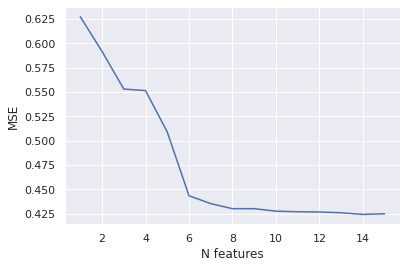

In [ ]:
list_MSE = []

for i in range(1,16):
    X = df_features[best_features[:i]]
    print(f'Using features: {X.columns}')
    X = X.to_numpy()
    X = scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

    regr = SGDRegressor(alpha = 0.0001)
    MSE = cross_val_score(regr, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    MSE = abs(MSE)
    list_MSE.append(MSE)
    print(f'MSE: {MSE}')
    
plt.plot(range(1,16),list_MSE)
plt.xlabel('N features')
plt.ylabel('MSE')
plt.show()

Using features: Index(['STRN'], dtype='object')
MSE: 0.7241639611599408
Using features: Index(['STRN', 'KWG'], dtype='object')
MSE: 0.7226035776034943
Using features: Index(['STRN', 'KWG', 'MDIMA'], dtype='object')
MSE: 0.724318794856587
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI'], dtype='object')
MSE: 0.7228070658785224
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN'], dtype='object')
MSE: 0.7198634369410621
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB'], dtype='object')
MSE: 0.7192247136043405
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB', 'STRM'], dtype='object')
MSE: 0.7127192176420356
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB', 'STRM', 'SB'], dtype='object')
MSE: 0.6995347352357953
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB', 'STRM', 'SB', 'NDIMC'], dtype='object')
MSE: 0.6861225365544886
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB', 'STRM'

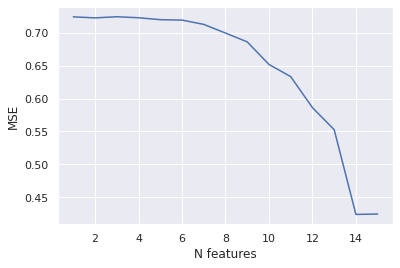

In [ ]:
best_features.reverse()
list_MSE = []

for i in range(1,16):
    X = df_features[best_features[:i]]
    print(f'Using features: {X.columns}')
    X = X.to_numpy()
    X = scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

    regr = SGDRegressor(alpha = 0.0001)
    MSE = cross_val_score(regr, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    MSE = abs(MSE)
    list_MSE.append(MSE)
    print(f'MSE: {MSE}')
    
plt.plot(range(1,16),list_MSE)
plt.xlabel('N features')
plt.ylabel('MSE')
plt.show()


In [ ]:
X = scaler.fit_transform(df_features)
df_target = pd.qcut(df['target'].values, q=4, labels=False)
Y = df_target.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [ ]:
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 53716, 1: 53703, 2: 53707, 3: 53707}


KNN

Cross validation accuracy with K-fold=5: 0.6741375106604743
Test accuracy: 0.6843924113125044


Text(0.5, 1.0, 'Test Results')

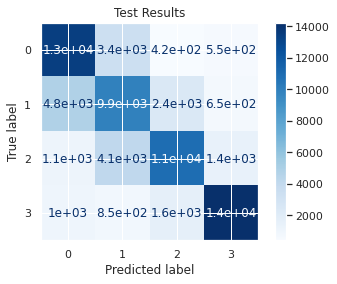

In [ ]:
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_score = cross_val_score(knn_classifier, X_train, Y_train, cv = 5, scoring="accuracy")
score = knn_score.mean()
print(f'Cross validation accuracy with K-fold=5: {score}')

knn_classifier.fit(X_train, Y_train)
Y_pred = knn_classifier.predict(X_test)

print(f'Test accuracy: {metrics.accuracy_score(Y_test, Y_pred)}')

disp = metrics.plot_confusion_matrix(knn_classifier, X_test, Y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Results')

Decision Tree

Cross validation accuracy with K-fold=5: 0.9579541067660481
Test accuracy: 0.9665984907257211


Text(0.5, 1.0, 'Test Results')

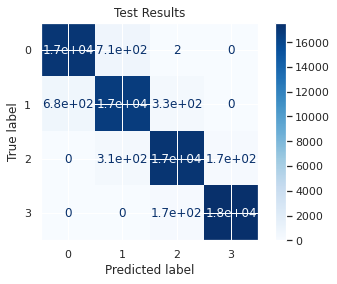

In [ ]:
tree_classifier = tree.DecisionTreeClassifier()
tree_score = cross_val_score(tree_classifier, X_train, Y_train, cv = 5, scoring="accuracy")
score = tree_score.mean()
print(f'Cross validation accuracy with K-fold=5: {score}')

tree_classifier.fit(X_train, Y_train)
Y_pred = tree_classifier.predict(X_test)

print(f'Test accuracy: {metrics.accuracy_score(Y_test, Y_pred)}')

disp = metrics.plot_confusion_matrix(tree_classifier, X_test, Y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Results')